In [3]:
import pandas as pd
import matplotlib.pyplot as plt

TAGS = ["Sex", "Age", "HR", "Height", "Weight", "BP"]
NUMBER_TAGS = ["Age", "HR", "Height", "Weight", "BP"]

def check_int(v):
    return len(v) != 0 and v.isnumeric()

def transform(df):
    result = dict()
    for i in range(len(df)):
        line = list(df.loc[i])
        name = line[0]
        tag = line[1]
        val = line[2]
        if result.get(name) is None:
            result[name] = dict()
        result[name][tag] = val

    csv_table = {"Name" : list()}
    for t in TAGS:
        csv_table[t] = list()

    for name, v in result.items():
        csv_table["Name"].append(name)
        for t in TAGS:
            csv_table[t].append(v.get(t, str()))
    return pd.DataFrame(csv_table)

def add_average(df):
    accm_row = {"Name" : "Avg"}
    for t in TAGS:
        accm_row[t] = str() 

    for t in NUMBER_TAGS:
        cnt = 0
        accm = 0
        for v in df[t]:
            if len(v) != 0:
                accm += int(v)
                cnt += 1
        accm_row[t] = "{:.2f}".format(accm/cnt)
    return df._append(accm_row, ignore_index=True)

def find_max(df):
    for t in NUMBER_TAGS:
        max_name = list()
        max_val = None
        for idx, v in enumerate(df[t]):
            if check_int(v):
                if max_val is None or int(v) > max_val:
                    max_val = int(v)
                    max_name.clear()
                    max_name.append(df["Name"][idx])
                elif int(v) == max_val:
                    max_name.append(df["Name"][idx])
        print("{} {} {}".format(t, max_name, max_val))

def scatter(df):
    def separate(data):
        data_x = list()
        data_y = list()
        for x, y in data:
            data_x.append(x)
            data_y.append(y)
        return data_x, data_y

    data_m = list()
    data_f = list()

    for idx, v in enumerate(df["Sex"]):
        w = df["Weight"][idx]
        h = df["Height"][idx]
        if check_int(w) and check_int(h):
            w = int(w)
            h = int(h)
            if v == "M":
                data_m.append((w, h))
            elif v == "F":
                data_f.append((w, h))

    data_m_x, data_m_y = separate(data_m)
    data_f_x, data_f_y = separate(data_f)
    plt.scatter(data_m_x, data_m_y, c='b')
    plt.scatter(data_f_x, data_f_y, c='r')
    plt.show()

def pie_and_bar(df):
    def as_data(ages):
        x = list()
        y = list()
        labels = list()
        keys = sorted(list(ages.keys()))
        for k in keys:
            x.append(k+1)
            y.append(ages[k])
            labels.append("{}-{}".format(10*k+1, 10*(k+1)))
        return x, y, labels

    ages = dict()
    for idx, v in enumerate(df["Age"]):
        if check_int(v):
            level = (int(v)-1) // 10
            if not level in ages:
                ages[level] = 0
            ages[level] += 1

    x, y, labels = as_data(ages)
    plt.pie(y, labels=labels, radius=1.5)
    plt.show()
    plt.bar(x, y, tick_label=labels)
    plt.show()

def sex_pie(df):
    def as_data(sex):
        x = [sex["M"], sex["F"]]
        labels = ["Male", "Female"]
        return x, labels

    sex = { "M" : 0 , "F" : 0 }
    for v in df["Sex"]:
        if len(v) != 0:
            sex[v] += 1

    x, labels = as_data(sex)
    plt.pie(x, labels=labels, radius=1.5)
    plt.show()

### 首先轉換成如對應的 dataframe 的格式

In [2]:
df = transform(pd.read_csv("HW1_data.csv"))
print(df)

         Name Sex Age  HR Height Weight   BP
0      Daniel   M  37  80    165     72  131
1       Avery   F  66  72    159     54  121
2      Joseph   M  42        168     70  110
3     Jackson   M  46  81    170     64   97
4        Nora   F  48  82    153     59   93
5       Aiden   M  38  93    166     69  136
6      Evelyn   F  60  67    168     60  106
7        Zoey   F  37  79                112
8     Matthew   M  69  85    166     70  128
9       Layla   F  12  87    156     47  142
10   Isabella   F  31  82    151     51   94
11       Mila   F  48        164     48  139
12      Emily   F  52  84    166     46   98
13      Lucas   M  39        171     64  148
14       Ella   F  10  80    168     67  137
15     Elijah   M  30  64    177     73  137
16  Alexander   M  43  66    171     62  124
17      Chloe   F  70  81    174     66   93
18       Emma   F  35  61    159     64  137
19     Sophia   F  66  62    168     49  144
20    Madison   F  74  80                   
21   Victo

### 計算出 Age, HR, Height, Weight 及 BP 的平均值加於 dataframe 最下列

In [4]:
avg_df = add_average(df)
print(avg_df)

         Name Sex    Age     HR  Height Weight      BP
0      Daniel   M     37     80     165     72     131
1       Avery   F     66     72     159     54     121
2      Joseph   M     42            168     70     110
3     Jackson   M     46     81     170     64      97
4        Nora   F     48     82     153     59      93
5       Aiden   M     38     93     166     69     136
6      Evelyn   F     60     67     168     60     106
7        Zoey   F     37     79                    112
8     Matthew   M     69     85     166     70     128
9       Layla   F     12     87     156     47     142
10   Isabella   F     31     82     151     51      94
11       Mila   F     48            164     48     139
12      Emily   F     52     84     166     46      98
13      Lucas   M     39            171     64     148
14       Ella   F     10     80     168     67     137
15     Elijah   M     30     64     177     73     137
16  Alexander   M     43     66     171     62     124
17      Ch

### 利用程式找出並於螢幕列出各分項指標 feature（Age, HR, Height, Weight 及 BP）中之最大者的姓名（Name）。

In [5]:
find_max(df)

Age ['Madison'] 74
HR ['Liam'] 94
Height ['Mason'] 186
Weight ['Mason', 'Jacob', 'Logan'] 76
BP ['Lucas'] 148


### 請繪製身高體重（Height, Weigth）之散佈圖（Scatter Plot），女生請以紅點標示，男生請以藍點標示。

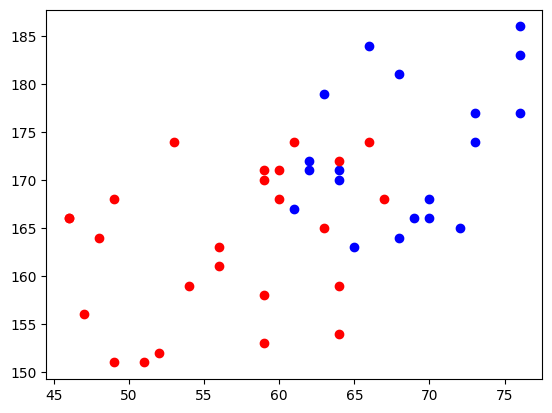

In [6]:
scatter(df)

### 繪製不同年齡（Age）區間的人數直方圖及圓餅圖（Pie Chart）。請依 1-10, 11-20, 21-30…每 10 歲為一個區間統計。

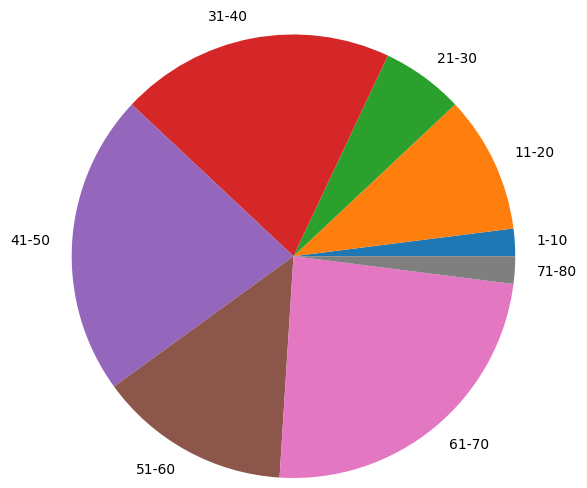

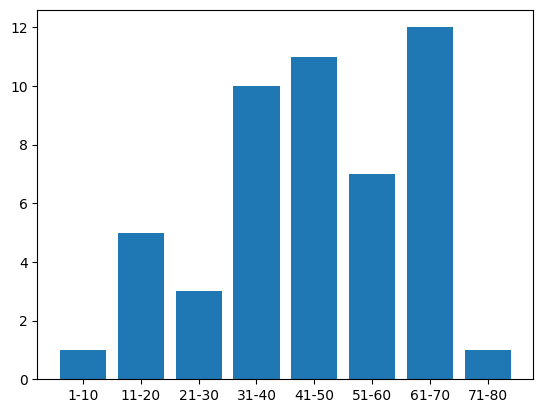

In [7]:
pie_and_bar(df)

### 繪製男女性別分佈比例之圓餅圖（Pie Chart）。

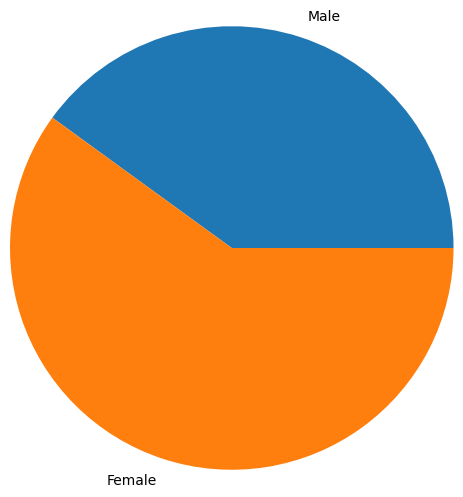

In [8]:
sex_pie(df)